In [ ]:
%pip install scikit-learn numpy pandas matplotlib seaborn kagglehub--quiet

Note: you may need to restart the kernel to use updated packages.


Load Dataset from kaggle

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [12]:
df=pd.read_csv(path + "/country-data.csv")
df_info=pd.read_csv(path + "/data-dictionary.csv")

In [11]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
df_info

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


Information About Data

In [20]:
df.shape

(167, 10)

In [21]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [23]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [25]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(0)

From above analysis, we can understand that the data is clean. There are no null and duplicate values. Now we can further proceed to EDA.

Exploratory Data Analysis

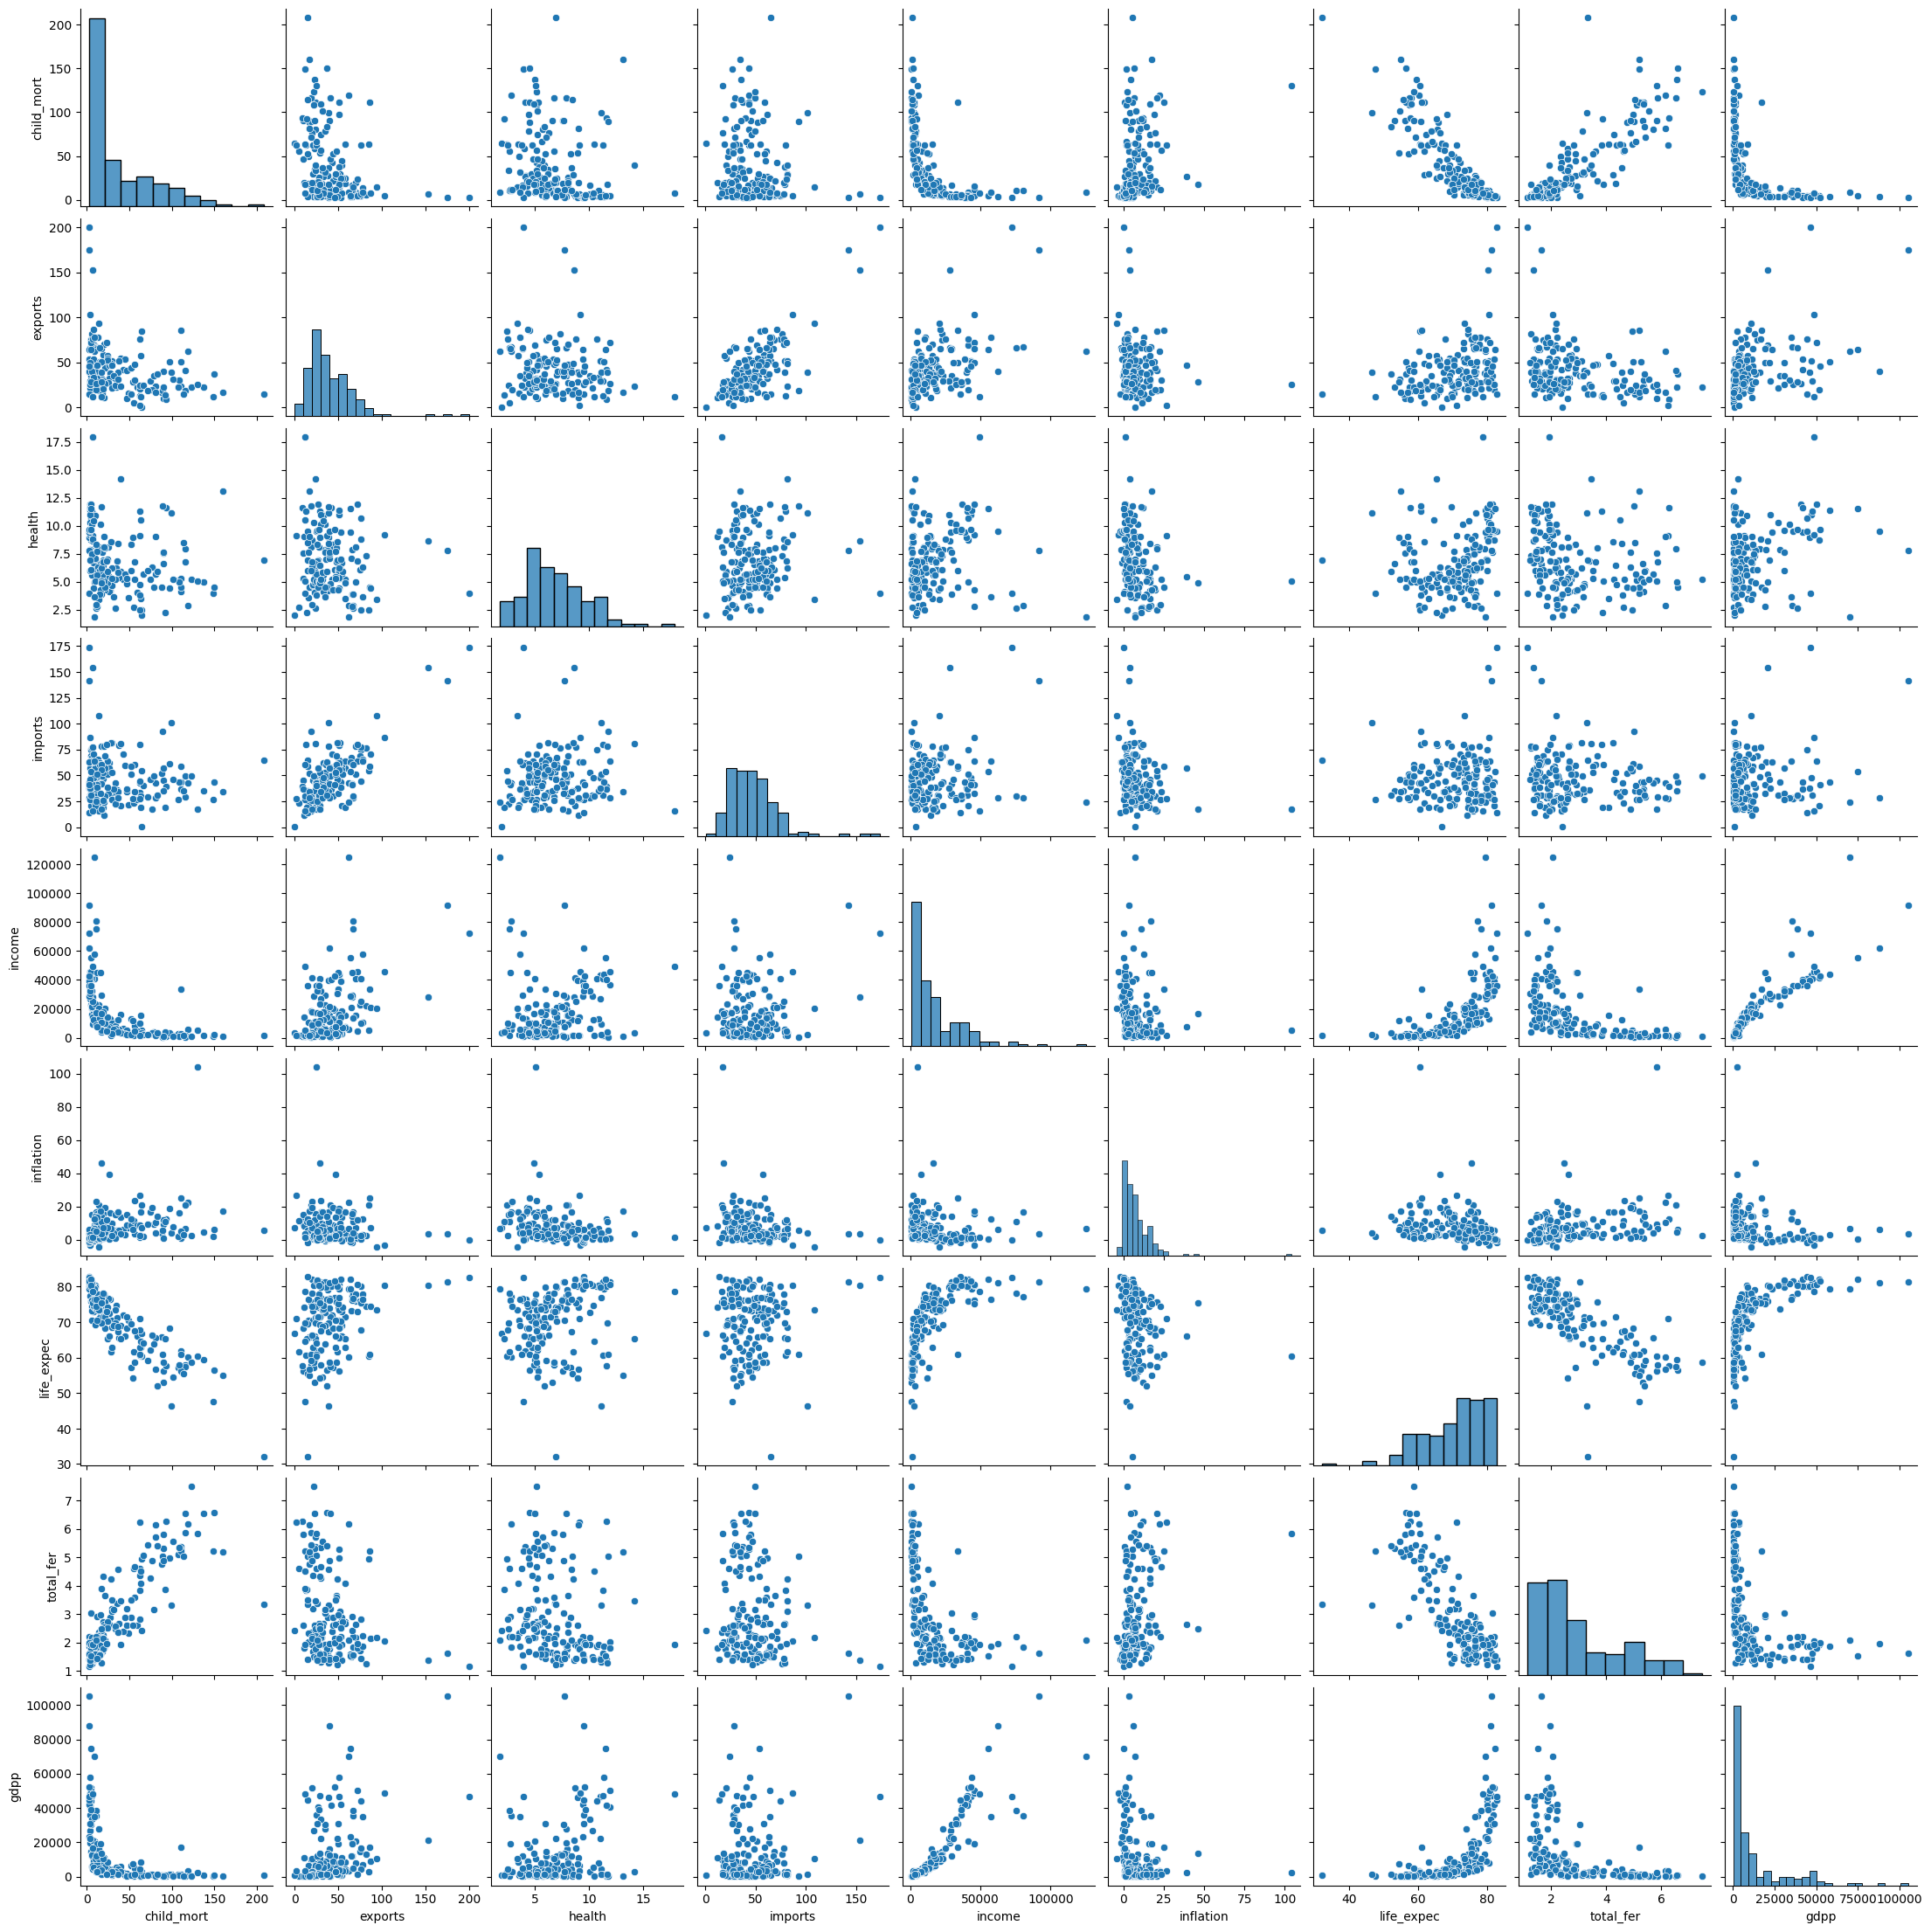

In [29]:
sns.pairplot(df)
plt.show()


Above we can find that there are some outliers in each case. So we will need to remove those outliers so there won't be any problems in future. Now our main goal will be what technique to use to remove those outliers.

In [30]:
numerical_col=df.select_dtypes(include=[np.number]).columns.tolist()
categorical_col=df.select_dtypes(exclude=[np.number]).columns.tolist()

In [31]:
numerical_col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [32]:
categorical_col

['country']

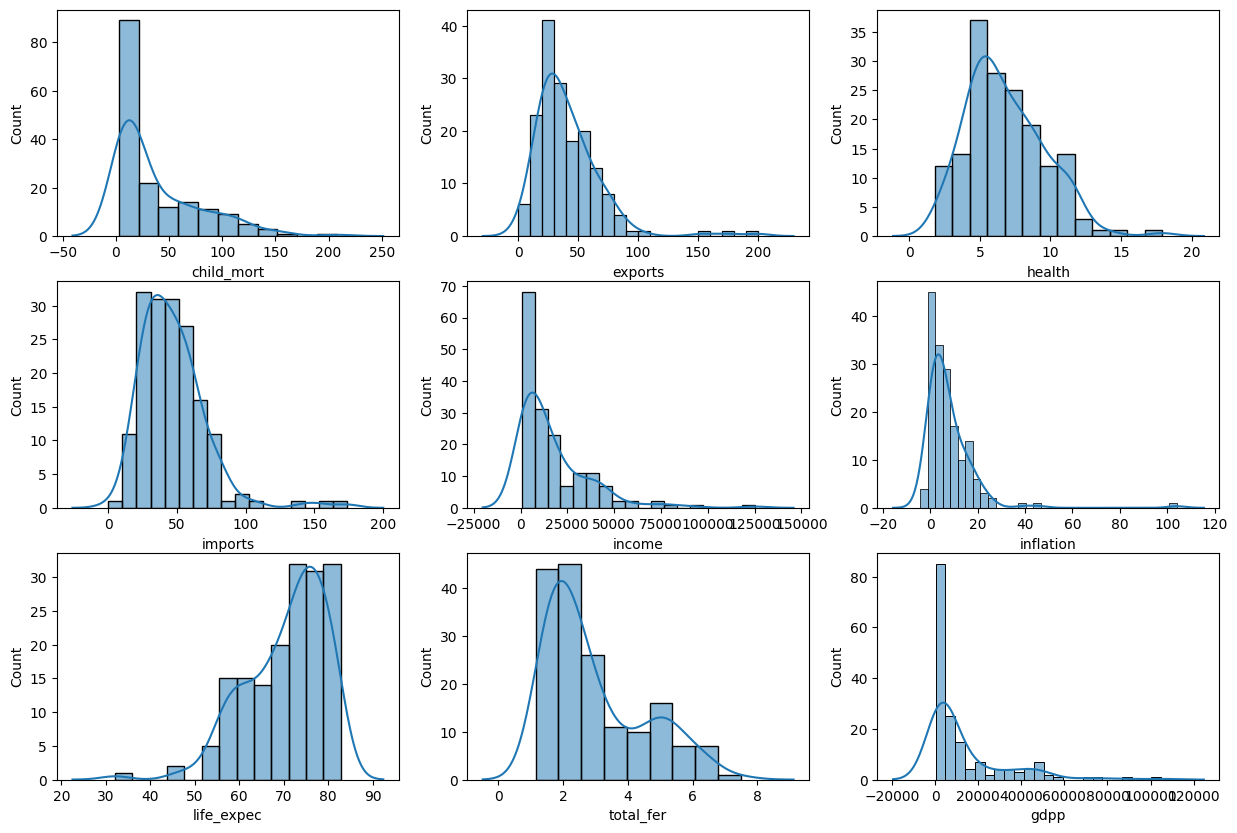

In [57]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
axes=axes.flatten()
for i in range(len(numerical_col)):
    sns.histplot(df[numerical_col[i]],ax=axes[i],kde=True,kde_kws={'cut': 3})

plt.show()


Most of the data distribution are seen as right skewed(Positively Skewed) and some are seen as left skewed. If necessary we can apply log/sqrt to normalize right skew and inverse/exp for left skew.

In [62]:
df[numerical_col].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<Axes: >

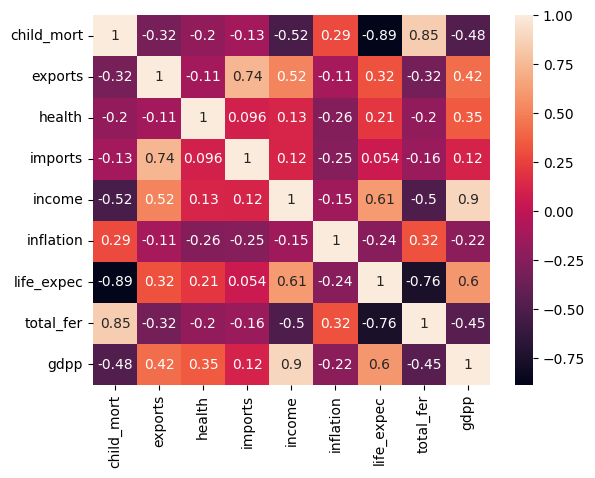

In [64]:
sns.heatmap(df[numerical_col].corr(),annot=True)

Highly correlated data needs to be removed to prevent overrfitting(depending upon the case). Above figure shows:
1. life_expec is highly correlated with child_mort.
2. total-fer is highly correlated with child_mort.
3. income is highly correlated with gdpp 

In [ ]:
##GDP Per Capita
cat=['High','Medium','Low']

df.sort_values(by='gdpp',ascending=False)



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.00,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.70,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000
...,...,...,...,...,...,...,...,...,...,...
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327


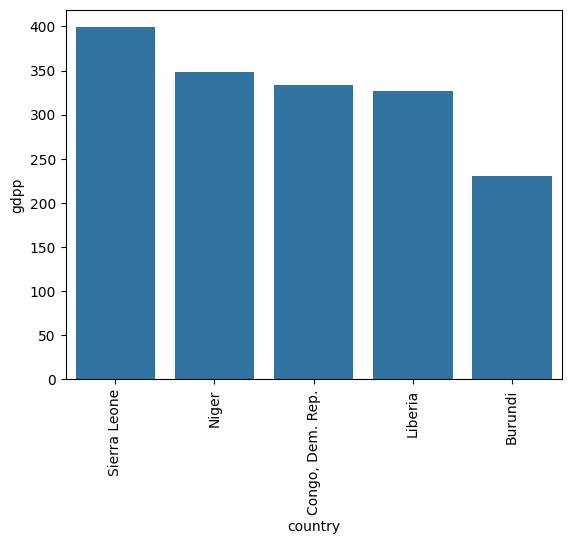

In [79]:

sns.barplot(x='country',y='gdpp',data=df.sort_values(by='gdpp',ascending=False).iloc[-5:])
plt.xticks(rotation=90) 
plt.show()

Lets visualize top 5 country for each features. For this we can use the seaborn plot as below

In [98]:
def visualize(feature):
    fig,ax=plt.subplots(1,3,figsize=(16,4))
    sns.barplot(x="country",y=feature,data=df.sort_values(by=feature,ascending=False).iloc[:5],ax=ax[0])
    sns.barplot(x="country",y=feature,data=df.sort_values(by=feature,ascending=False).iloc[80:85],ax=ax[1])
    sns.barplot(x="country",y=feature,data=df.sort_values(by=feature,ascending=False).iloc[-5:],ax=ax[2])

    for i in range(3):
        title=cat[i] + ' ' + feature
        ax[i].set_title(title)
        ax[i].tick_params(axis='x', labelrotation=60)
        mainTitle=feature + ' '+'vs' +' '+ 'Country'
    fig.suptitle(mainTitle, fontsize=16)

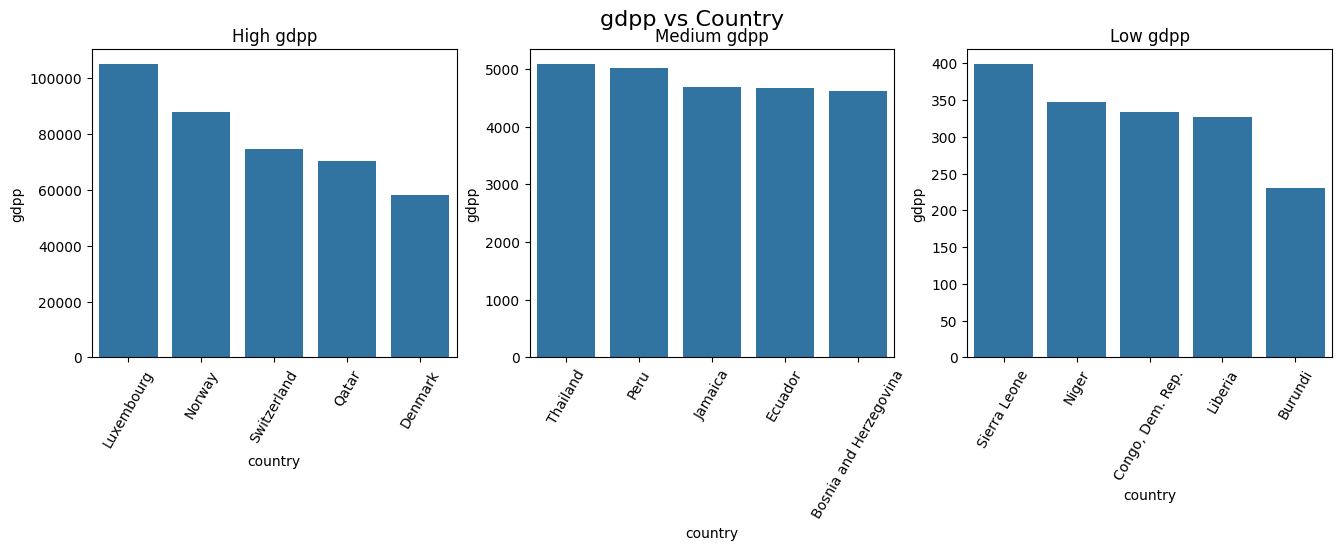

In [99]:
visualize('gdpp')
plt.show()

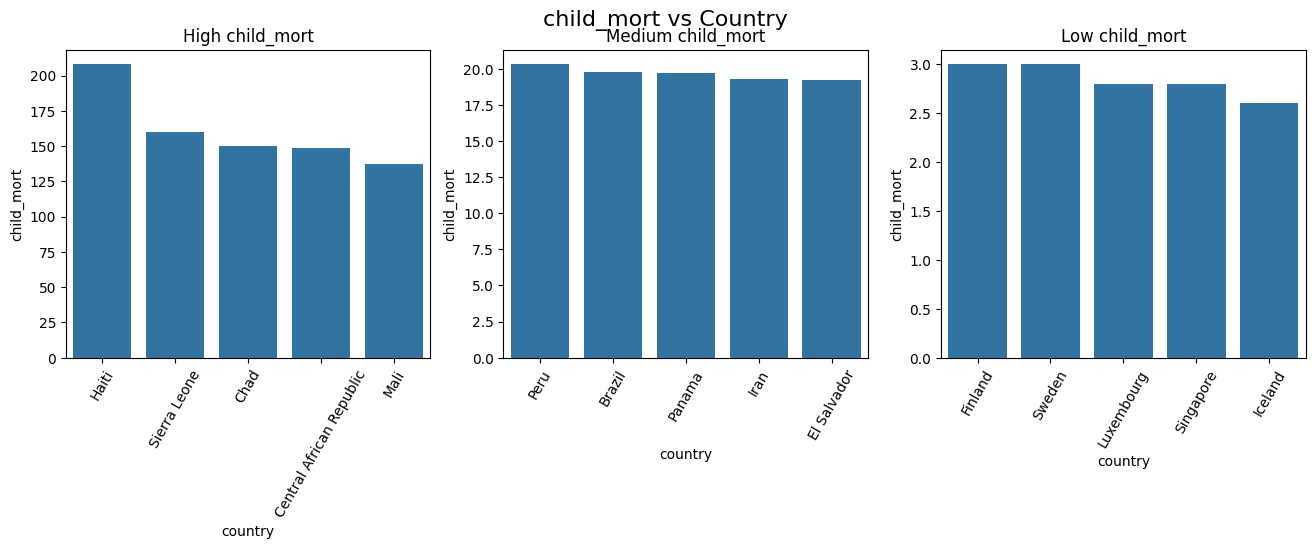

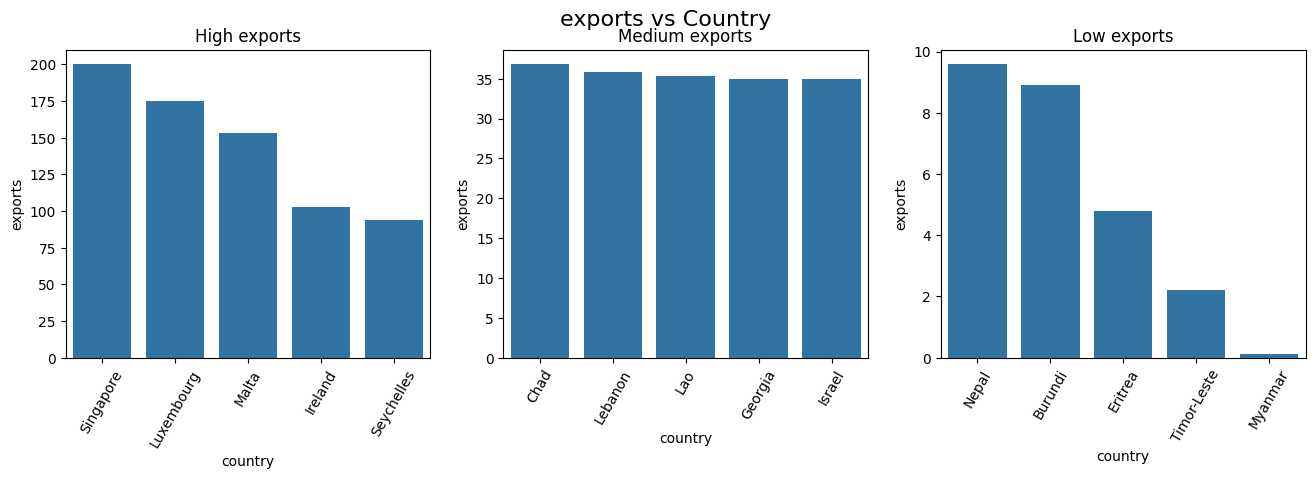

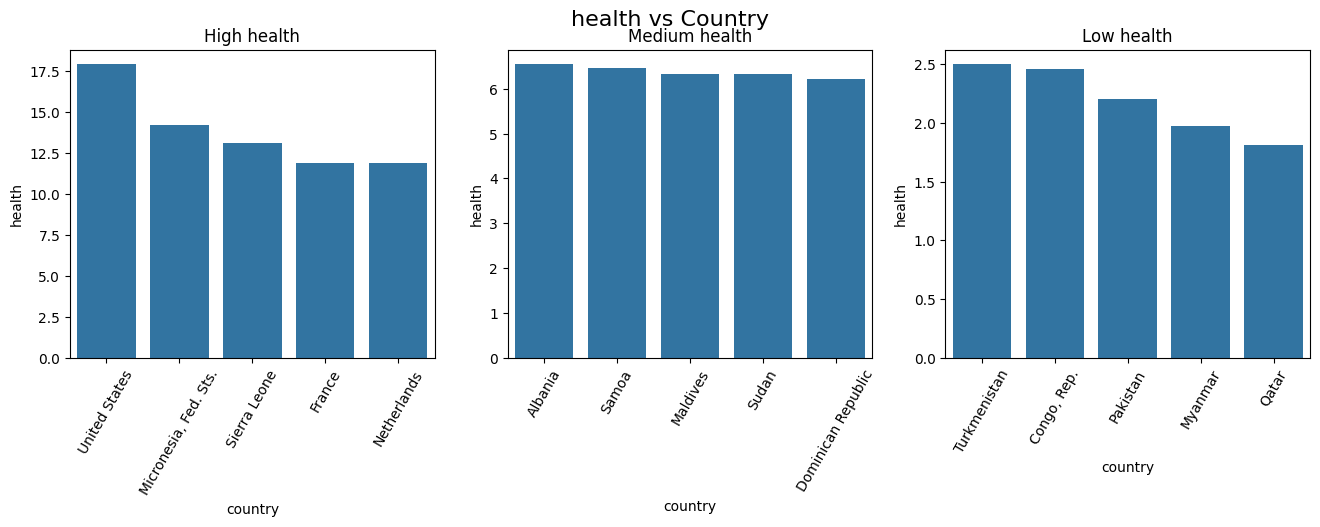

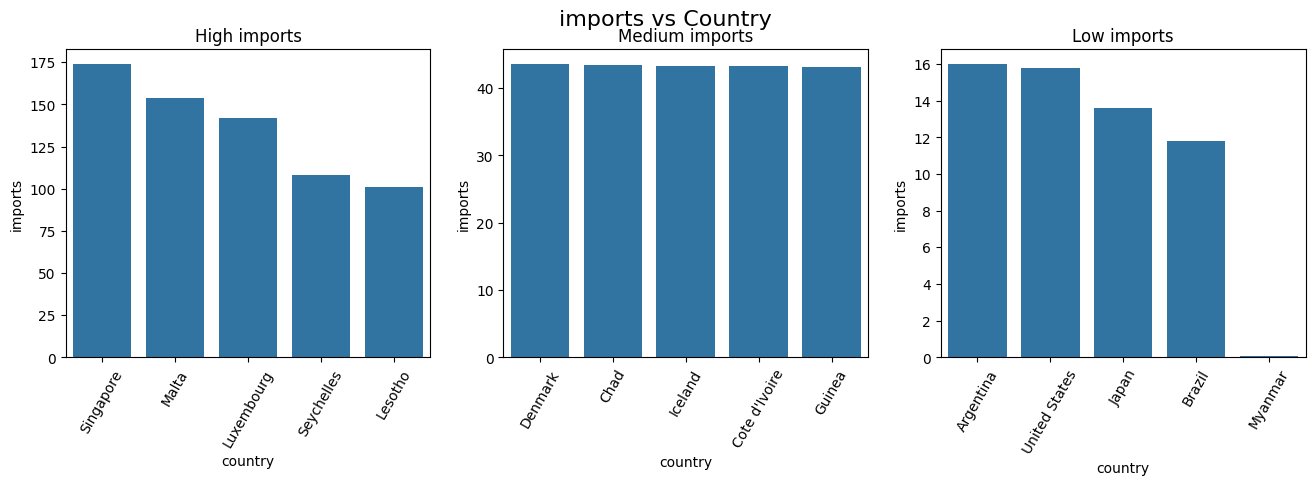

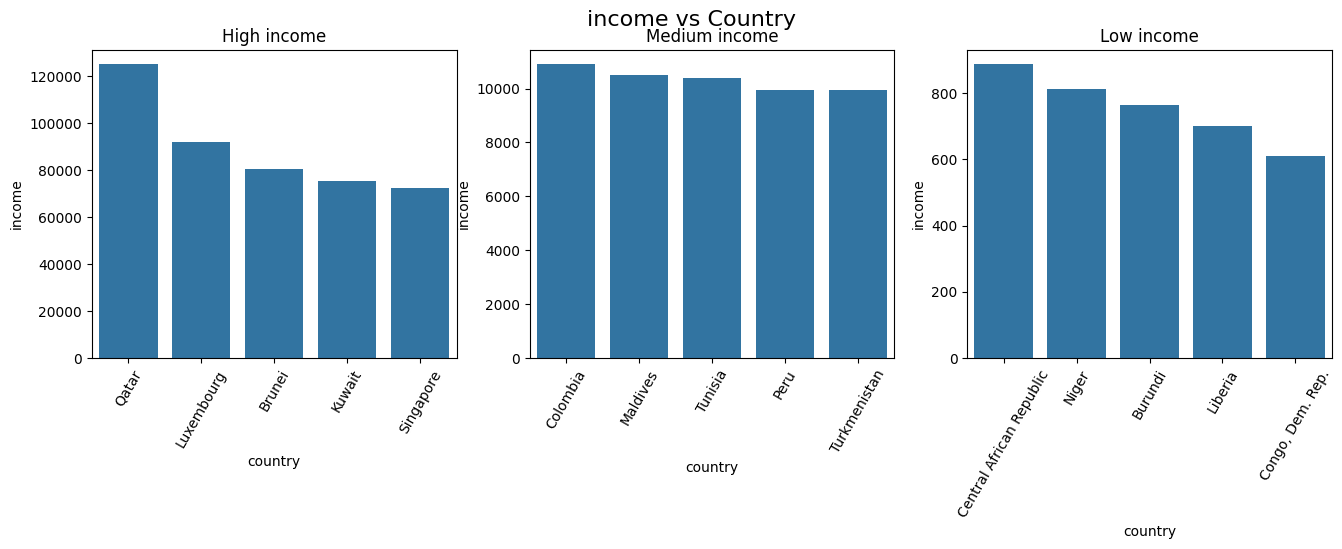

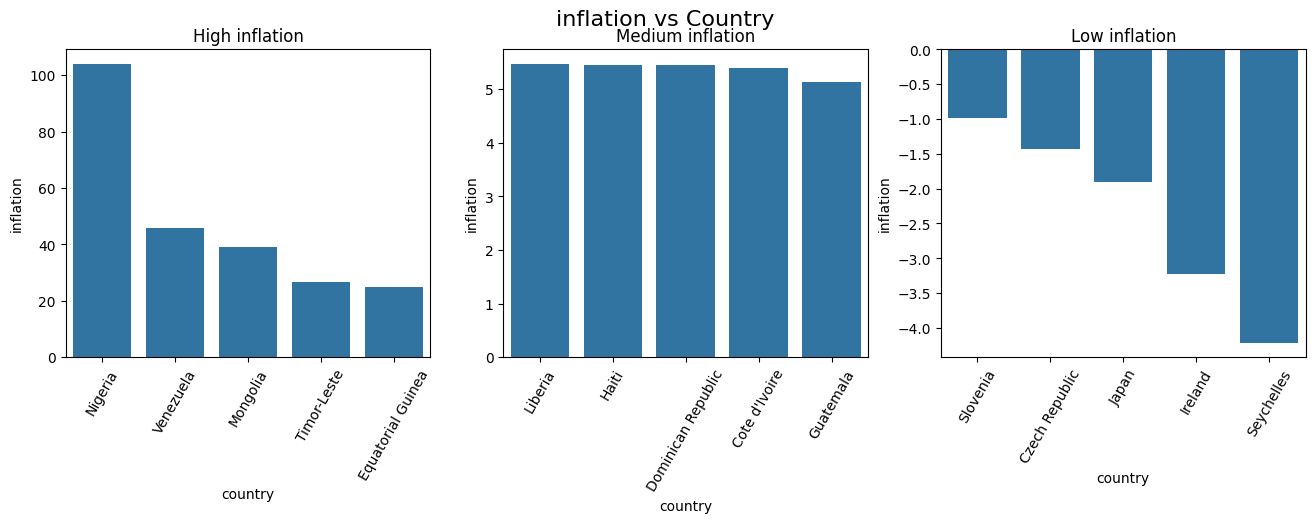

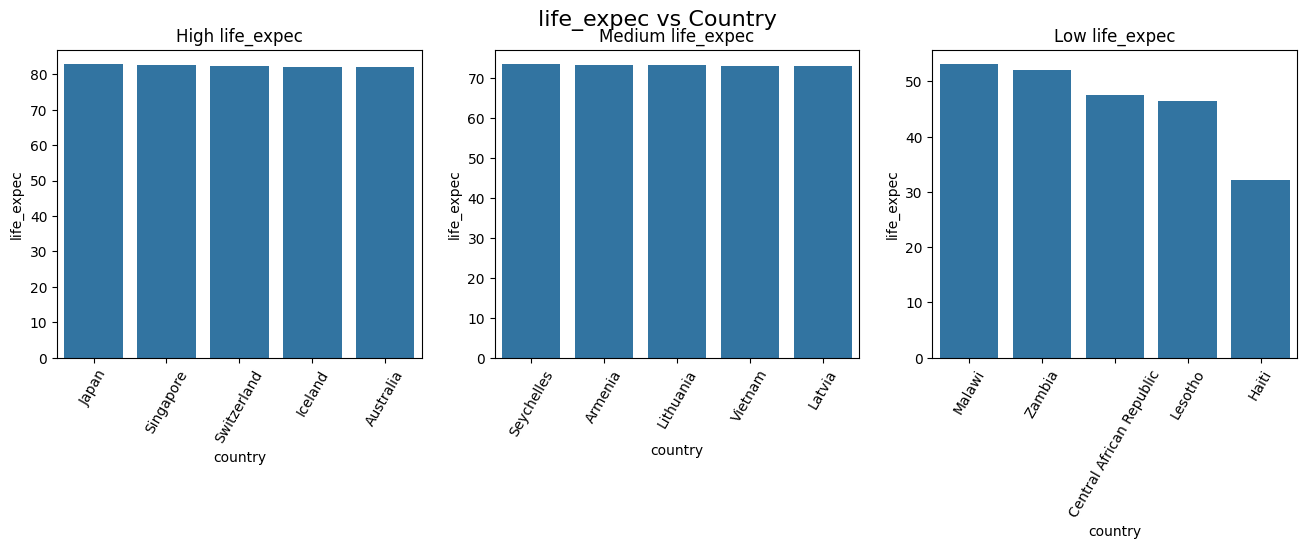

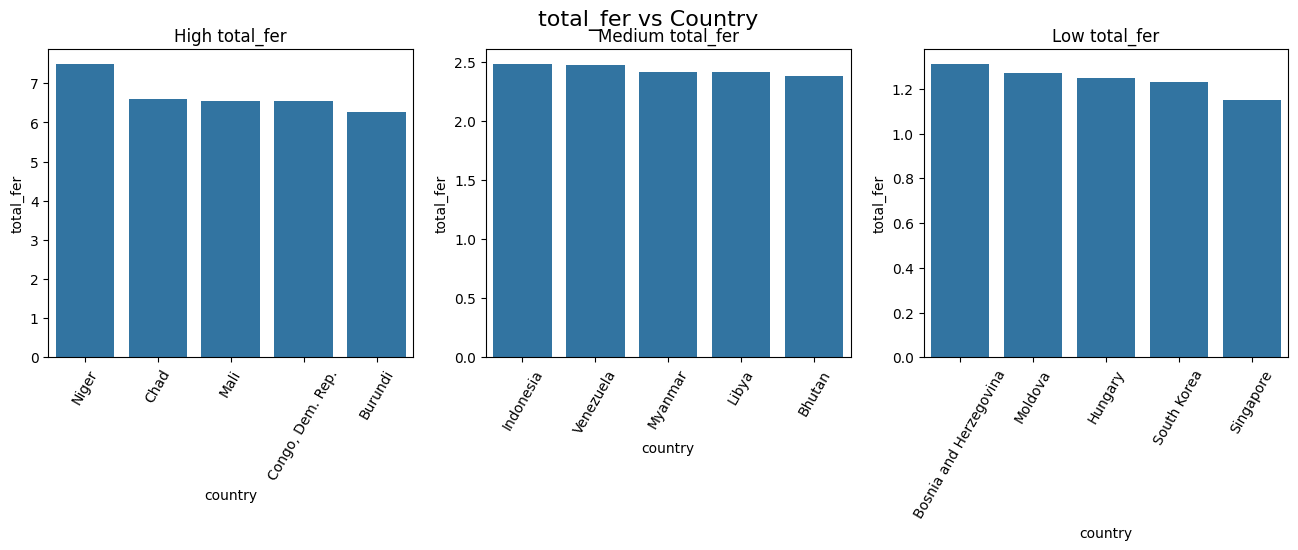

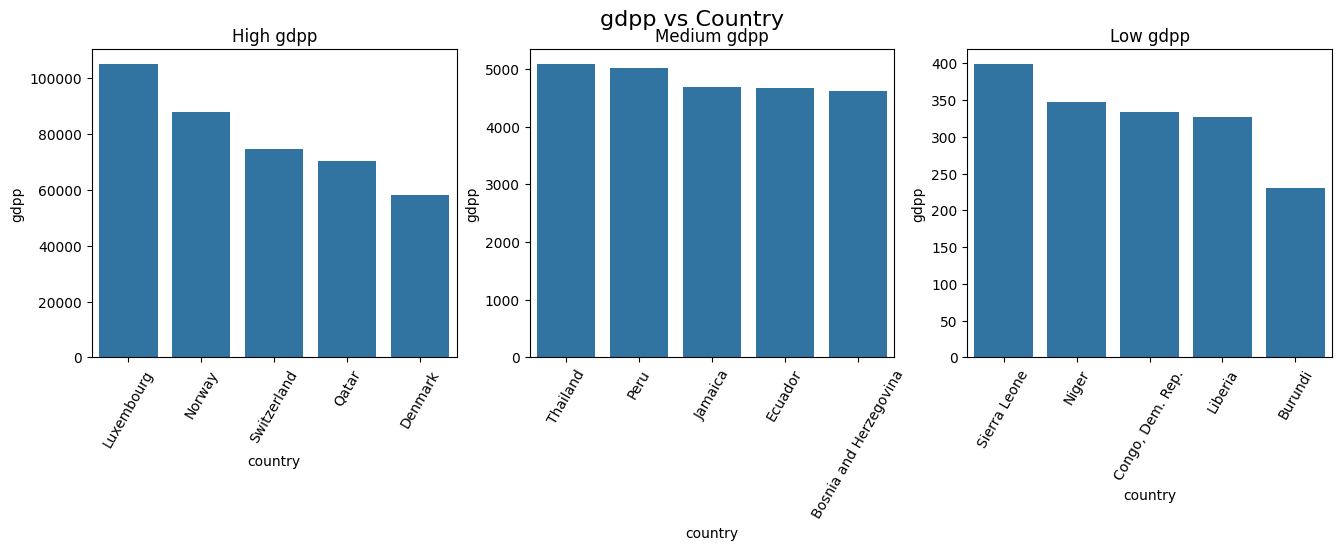

In [100]:
for i in numerical_col:
    visualize(i)

Now as per problem statement we have to find which countries need financial aid. From our given fetures we need to give financial aid to those country who has following features:

Child Mortality Rate (child_mort)
➤ High values show poor healthcare, malnutrition, and unsanitary conditions.

GDP per Capita (gdpp)
➤ Low GDP per person reflects overall economic weakness and low standard of living.

Average Income (income)
➤ Low income indicates poverty and limited access to resources and services.

Life Expectancy (life_expec)
➤ Short life spans often mean poor healthcare and harsh living conditions.

Health Expenditure (% of GDP) (health)
➤ Low health investment suggests insufficient medical facilities and services.

Boxplot for Univariate Analysis

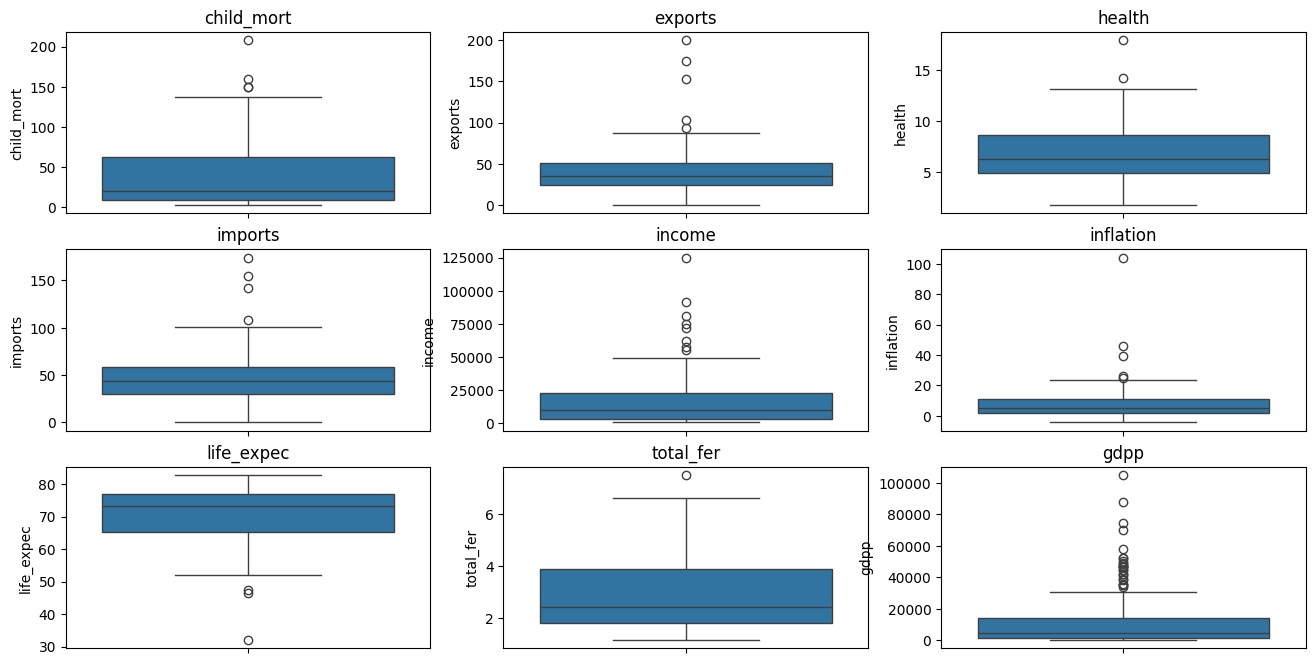

In [109]:
fig,ax=plt.subplots(3,3,figsize=(16,8))
ax=ax.flatten()
for i,col in enumerate(numerical_col):
    sns.boxplot(y=col,data=df,ax=ax[i])
    ax[i].set_title(col)
plt.show()

Here we can see that there are many outliers in gdpp. We can remove those countries as higher gdpp means those country are not in need of any such aids.

In [112]:
indexes=np.where(df['gdpp']>35000)
print(len(indexes[0]))

23


Feature Engineering